# Sklearn
1. Main Python ML library
2. Has numerous features to assist on all steps of the pipeline

In [28]:
import root_pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = root_pandas.read_root("/notebooks/public_train_10000.root")
features = data[list(set(data.columns) - {"event_id", "target"})]
target = data["target"]

## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

In [10]:
trainX, testX, trainY, testY = train_test_split(features, target, random_state=42)

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(trainX, trainY)
roc_auc_score(testY, knn_clf.predict_proba(testX)[:, 1])

0.62039587934568208

How will this compare to cross validation?

In [12]:
cv_scores = cross_val_score(
    KNeighborsClassifier(n_neighbors=1), features, target, scoring='roc_auc', n_jobs=4, cv=4)

In [13]:
np.mean(cv_scores), np.std(cv_scores)

(0.61592131519412685, 0.0077340089103426265)

**Exercise 0**. How stable is validation using train_test_split compared to cross validation? Use different random seeds for train_test_split and plot the distribution of scores.

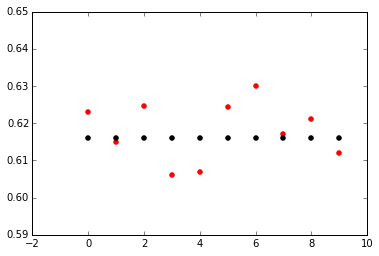

In [29]:

roc = []
cv = []
seeds = range(10)
for i in seeds:
    trainX, testX, trainY, testY = train_test_split(features, target, random_state=i)
    knn_clf = KNeighborsClassifier(n_neighbors=1)
    knn_clf.fit(trainX, trainY)
    roc.append(roc_auc_score(testY, knn_clf.predict_proba(testX)[:, 1]))
    cv.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), features, target, scoring='roc_auc', n_jobs=4, cv=4)))

plt.scatter(seeds, roc, color='red')
plt.scatter(seeds, cv, color='black')

In [30]:
def get_mean_cross_val_score(estimator, X, Y, *args, **kwargs):
    """Returns the mean cross validtion score and its standart deviation"""
    cv_scores = cross_val_score(estimator, X, Y, *args, **kwargs)
    return (np.mean(cv_scores), np.std(cv_scores))

Increasing the number of neighbours yields an improvement. 

In [31]:
get_mean_cross_val_score(KNeighborsClassifier(n_neighbors=10), features, target, scoring='roc_auc', n_jobs=4, cv=4)

(0.72285099723026269, 0.0066253468588189932)

**Exercise 1.** Try different distance metrics for KNN 0 find the best one.

(199, 199)


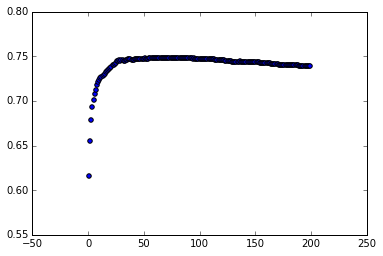

In [37]:
mbest = -1
ms = []
ss = []
ns = range(1,100)
for i in ns:
    m, s = get_mean_cross_val_score(KNeighborsClassifier(n_neighbors=i), features, target, scoring='roc_auc', n_jobs=4, cv=4)
    ms.append(m)
    ss.append(s)

plt.scatter(ns, ms);
    

## Decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

One of the few advantages of the decision tree is its interpretability

In [43]:
tree = DecisionTreeClassifier(max_depth=3).fit(features, target)


(0.67173622282880563, 0.0082972774260490906)

**Exercise 2.** Plot cross validation score of a DecisionTreeClassifier as a function of max_depth.

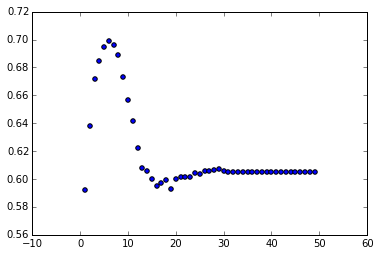

In [45]:
cv = []
md = range(1,50)
for d in md:
    m, s = get_mean_cross_val_score(DecisionTreeClassifier(max_depth=d), features, target, scoring='roc_auc', n_jobs=4, cv=4)
    cv.append(m)
    
plt.scatter(md, cv)

## Linear regression + Ridge regularization¶

In [75]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier(alpha=2000000)
ridge_clf.fit(trainX, trainY)
print roc_auc_score(testY, ridge_clf.predict(testX))
print roc_auc_score(trainY, ridge_clf.predict(trainX))


0.634184605519
0.621158648063


**Exercise 3.** Plot how regularization parametera alpha of RidgeClassifier, affects quality on train and test.

**Exercise 4.** Find the most important features for Decision tree - use feature\_importances_ . Verify whether they make sense. Take first N features by importance, cross-validate the Decision tree, plot the dependance of the score on N. Alternative

Many thanks to Alexey and Tatiana for the materials inspiraiton.